### Title 

# Heart Disease Prediction using Machine Learning

### Problem Statement
Heart disease is a leading cause of death worldwide. Early prediction can significantly reduce the risk of severe outcomes by enabling timely interventions. The goal is to build a machine learning model that can accurately predict the presence of heart disease based on patient health indicators.



### Objective
Perform Exploratory Data Analysis (EDA) to understand feature relationships.

Preprocess the data by handling missing values, outliers, and scaling.

Address class imbalance using techniques like class_weight='balanced'.

Train and evaluate multiple classification models.

###  Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data collection

In [3]:
# Load the dataset
df = pd.read_csv("framingham.csv")


In [4]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
df.tail()

Last few rows of the dataset:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


### Data Description

In [6]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(df.shape)

Dataset size:
(4240, 16)


In [7]:
# Display the columns of the dataset
columns = df.columns
print("Columns in the dataset:",columns)

Columns in the dataset: Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [8]:
# Numerical columns
numerical_features = df.select_dtypes(include='number').columns
print(numerical_features)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [9]:
# Categorical columns
categorical_features= df.select_dtypes(include=['object']).columns
print(categorical_features)

Index([], dtype='object')


### EDA (Exploratory Data Analysis)

In [10]:
# Get a summary of the dataset
print("Summary of the dataset:")
df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage

In [11]:
# Display statistical summary for all columns within the dataFram
df.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [12]:
# Describe the numerical features
print("Statistical description of numerical features:")
df.describe()

Statistical description of numerical features:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [13]:
# Check for Null Values 
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [14]:
# Check for Null Duplicates
print("Checking for duplicate records:")
print(df.duplicated().sum())

Checking for duplicate records:
0


### Data Visualization

<Figure size 2000x1000 with 0 Axes>

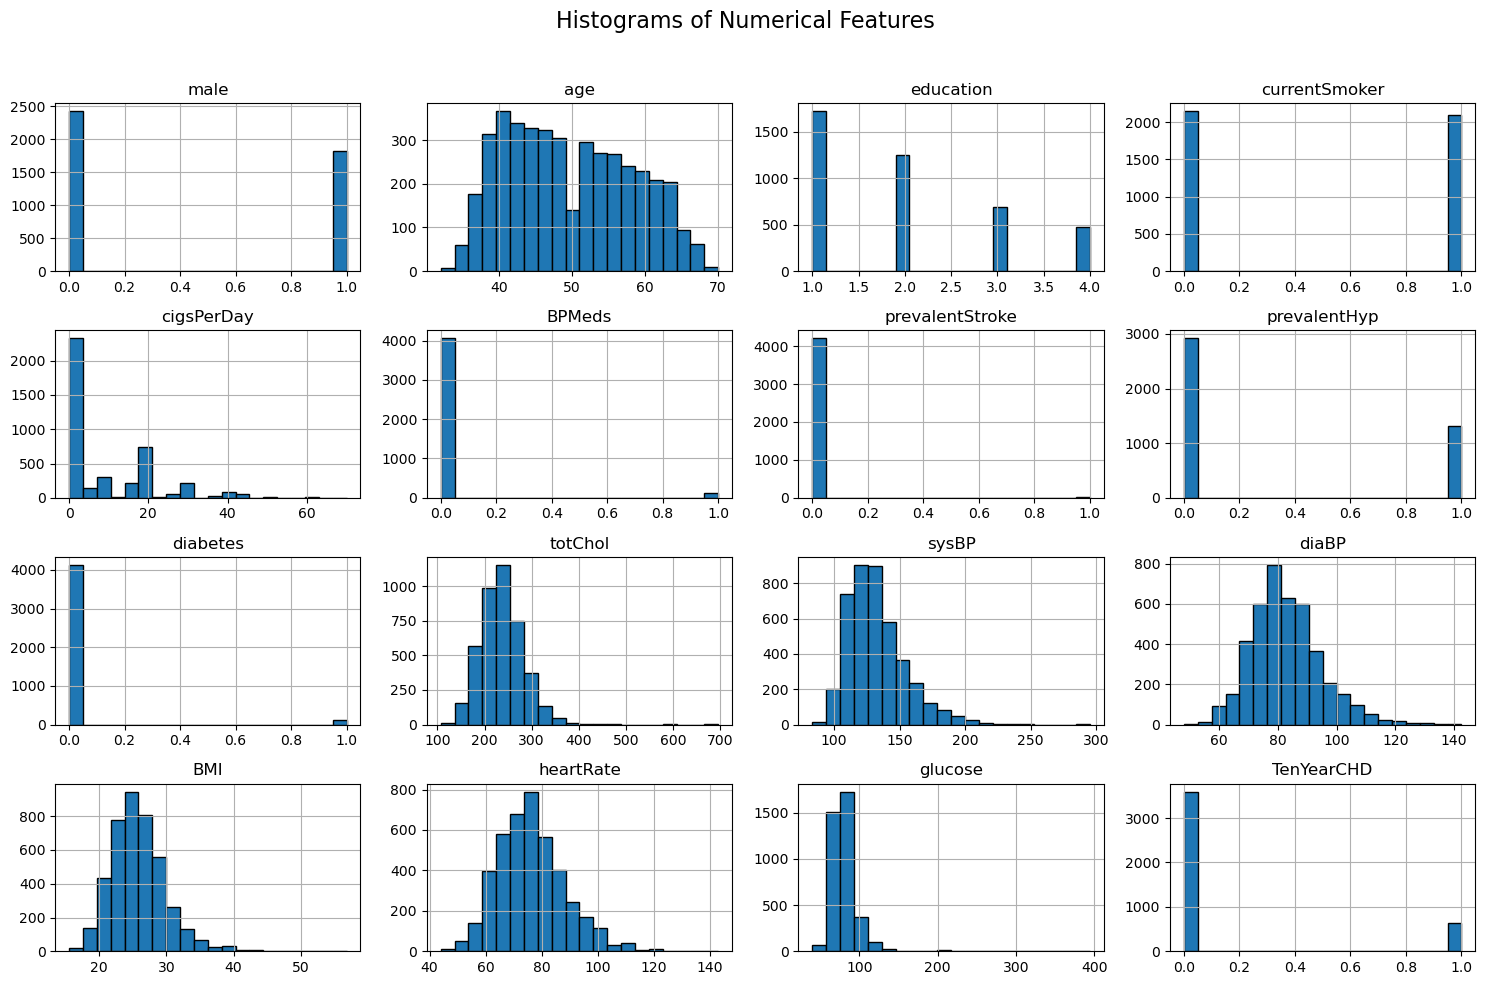

In [15]:

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
plt.figure(figsize=(20, 10))
df[numerical_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()


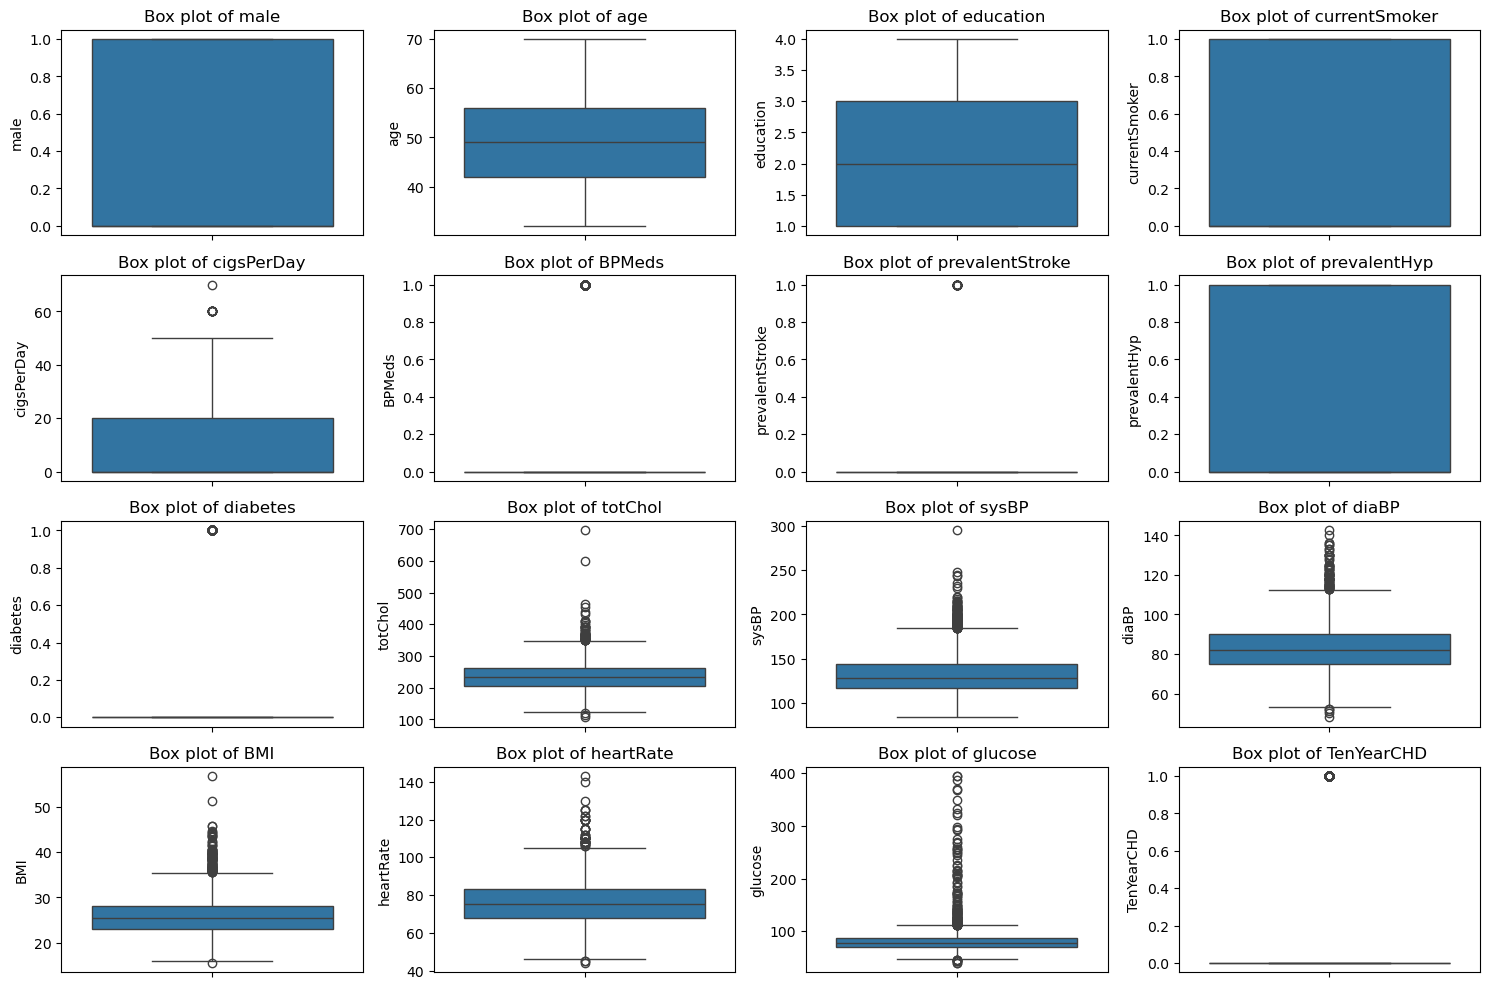

In [16]:


# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4,4, i+1)
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

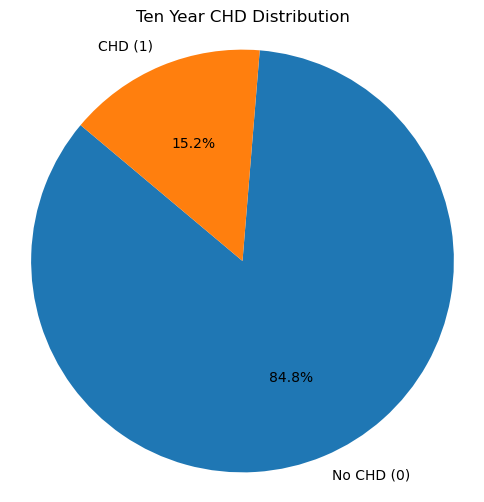

In [17]:
import matplotlib.pyplot as plt

# Value counts of the target variable
chd_counts = df['TenYearCHD'].value_counts()
labels = ['No CHD (0)', 'CHD (1)']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(chd_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Ten Year CHD Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


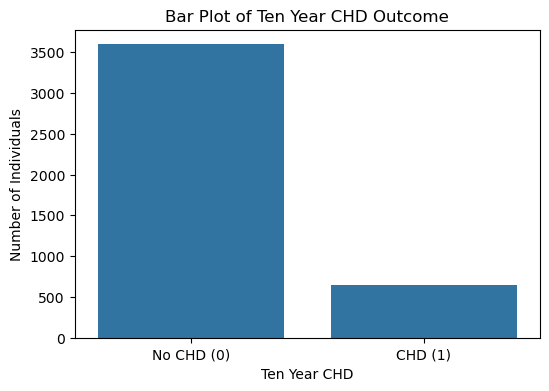

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each class
chd_counts = df['TenYearCHD'].value_counts().sort_index()

# Create bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=chd_counts.index, y=chd_counts.values)
plt.xticks([0, 1], ['No CHD (0)', 'CHD (1)'])
plt.xlabel('Ten Year CHD')
plt.ylabel('Number of Individuals')
plt.title('Bar Plot of Ten Year CHD Outcome')
plt.show()


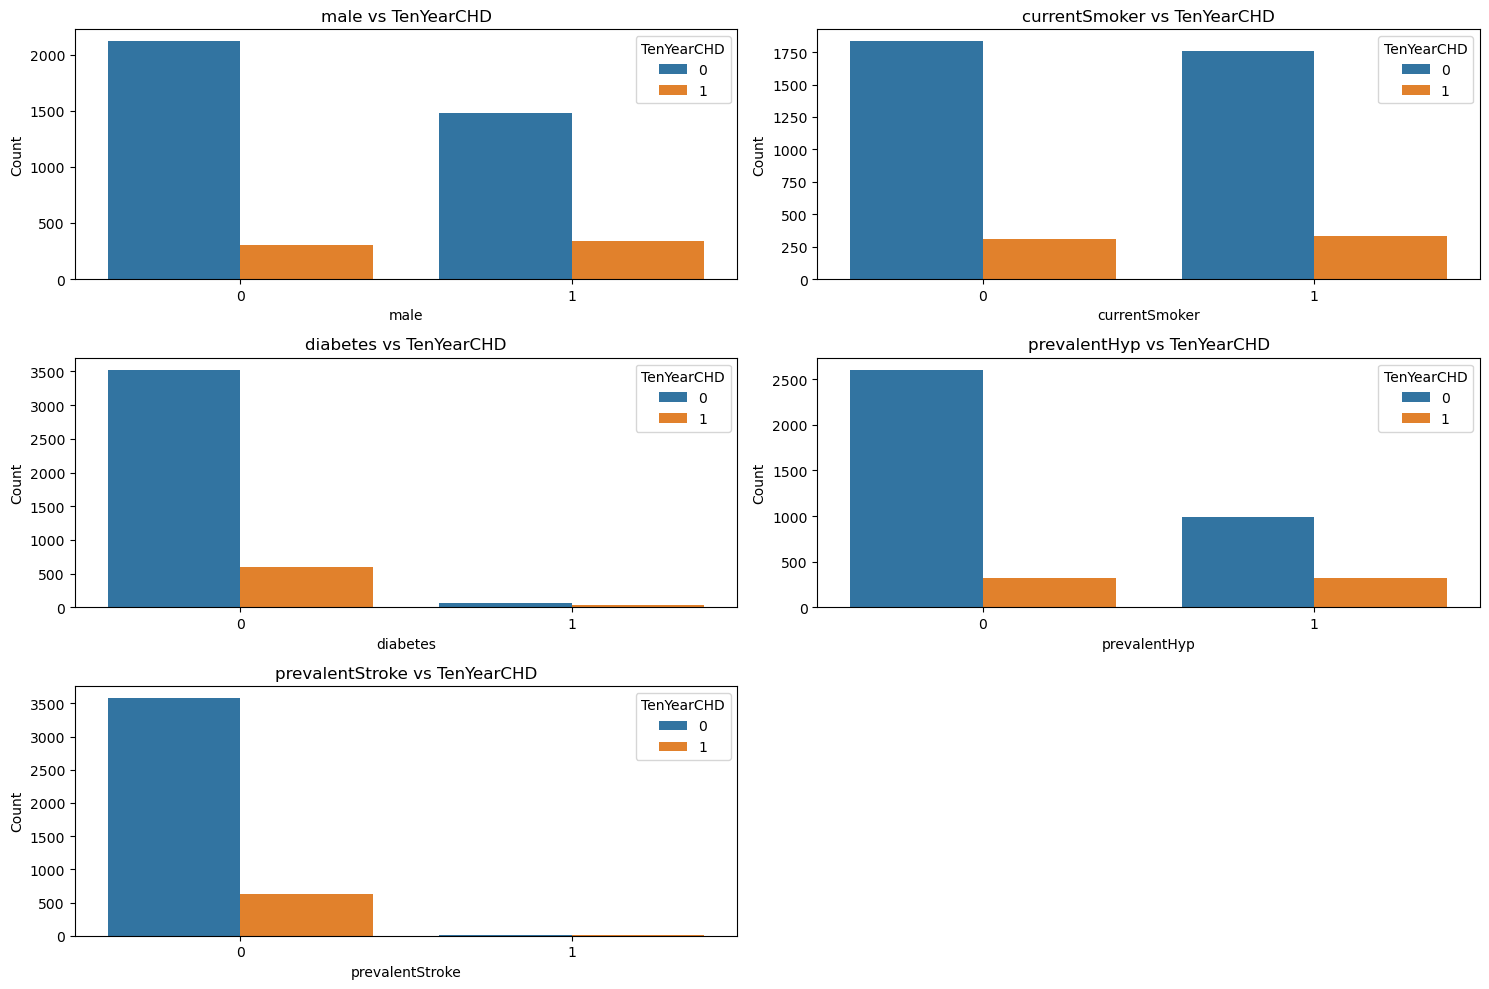

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['male', 'currentSmoker', 'diabetes', 'prevalentHyp', 'prevalentStroke']

plt.figure(figsize=(15, 10))  # Adjusted for 3 rows × 2 columns
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)  # 3 rows × 2 columns
    sns.countplot(x=feature, hue='TenYearCHD', data=df)
    plt.title(f'{feature} vs TenYearCHD')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='TenYearCHD')

plt.tight_layout()
plt.show()


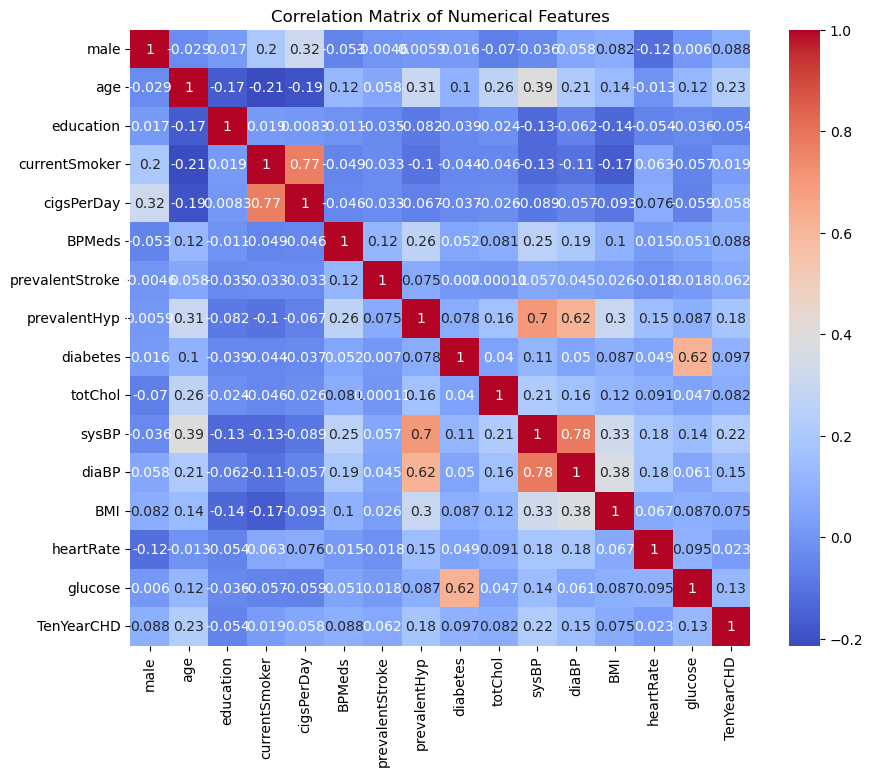

In [20]:
# Correlation matrix
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Data Preprocessing

#### Remove unnecessary columns

In [21]:
df.drop(['education',],axis=1,inplace=True)

#### Handling missing values

In [22]:
# List of columns with missing values to fill
cols_with_nulls = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# Fill missing values with median of each column
for col in cols_with_nulls:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)



In [23]:
# Check for Null Values 
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


#### Handling outliers

In [24]:
# Step 1: Select numerical columns except the target
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('TenYearCHD')  # exclude target column

# Step 2: Remove outliers using IQR method (on selected columns)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Step 3: Final shape after removing outliers
print("Data shape after outlier removal:", df.shape)


Data shape after outlier removal: (3489, 15)


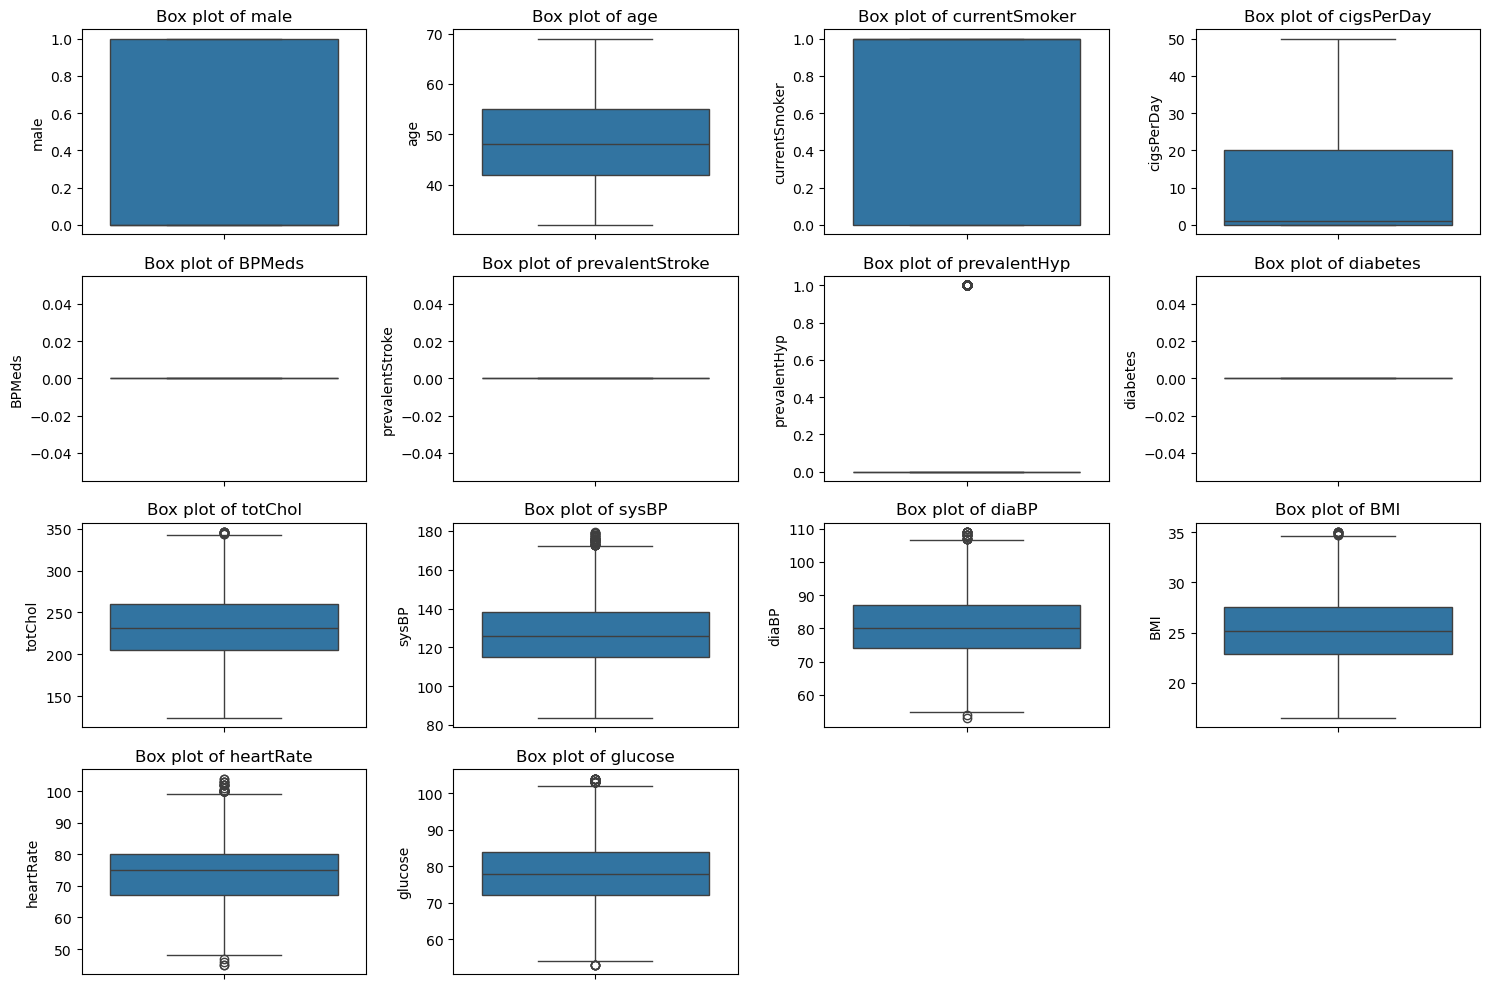

In [25]:



import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns excluding the target
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('TenYearCHD')

# Box plots for numerical features
plt.figure(figsize=(15, 10))  # Adjusted size for more spacing
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)  # Up to 16 plots (4x4 grid)
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()



### Data Splitting

In [26]:
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)


### Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

###  Model Selection

Accuracy Score: 0.8868194842406877

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       617
           1       1.00      0.02      0.05        81

    accuracy                           0.89       698
   macro avg       0.94      0.51      0.49       698
weighted avg       0.90      0.89      0.84       698



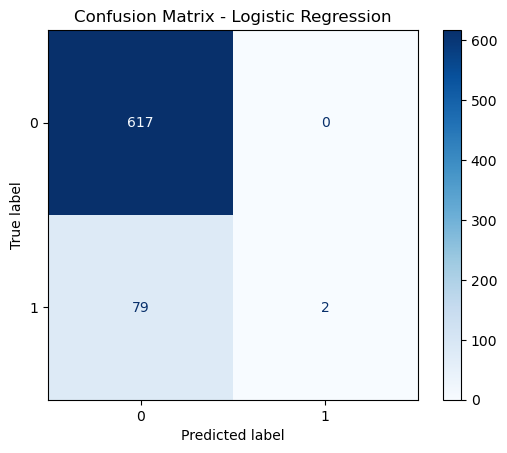

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Train the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix and Display
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### Model Training & Evaluation (Without feature Selection & Hyperparameter Tuning)

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the classifiers
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    
    # Make predictions
    pred = model.predict(X_test)
    
    # Append model name
    model_names.append(model.__class__.__name__)
    
    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)
models_df

,Accuracy,Precision,Recall,F1-Score
Model-Name,,,,
LogisticRegression,0.886819,1.000000,0.024691,0.048193
SVC,0.883954,0.000000,0.000000,0.000000
MLPClassifier,0.882521,0.444444,0.049383,0.088889
AdaBoostClassifier,0.881089,0.333333,0.024691,0.045977
RandomForestClassifier,0.876791,0.000000,0.000000,0.000000
GradientBoostingClassifier,0.872493,0.166667,0.024691,0.043011
KNeighborsClassifier,0.863897,0.230769,0.074074,0.112150
GaussianNB,0.816619,0.216867,0.222222,0.219512
DecisionTreeClassifier,0.776504,0.135922,0.172840,0.152174


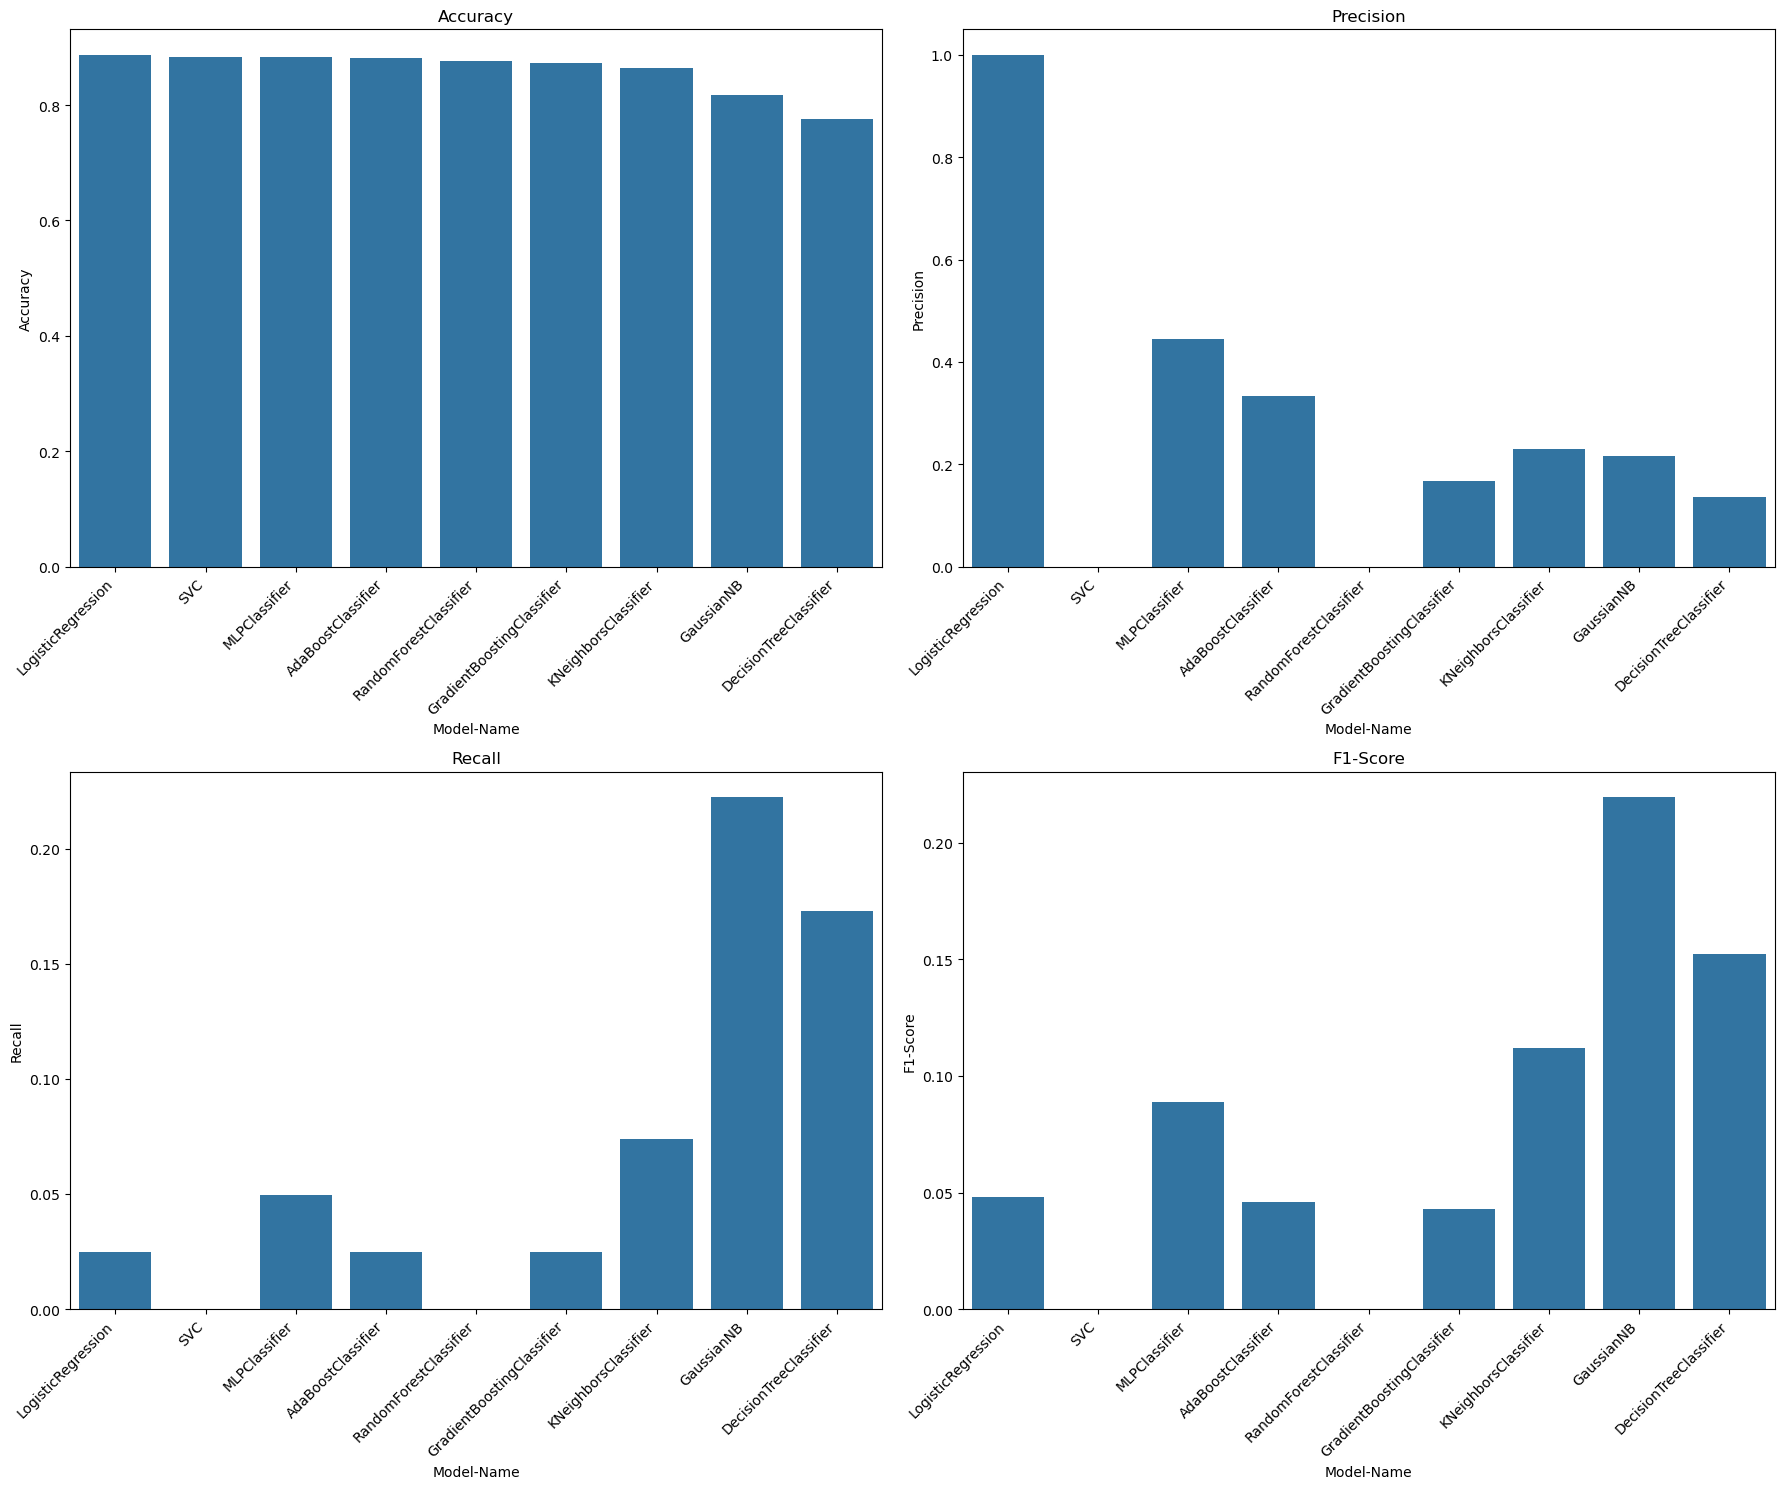

In [31]:
# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(18, 15))

sns.barplot(x=models_df.index, y=models_df['Accuracy'], ax=axes[0, 0])
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x=models_df.index, y=models_df['Precision'], ax=axes[0, 1])
axes[0, 1].set_title('Precision')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x=models_df.index, y=models_df['Recall'], ax=axes[1, 0])
axes[1, 0].set_title('Recall')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x=models_df.index, y=models_df['F1-Score'], ax=axes[1, 1])
axes[1, 1].set_title('F1-Score')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Handle imbalanced data  using class_weight='balanced'

Accuracy Score: 0.669054441260745

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.68      0.78       617
           1       0.20      0.59      0.29        81

    accuracy                           0.67       698
   macro avg       0.56      0.64      0.54       698
weighted avg       0.84      0.67      0.73       698



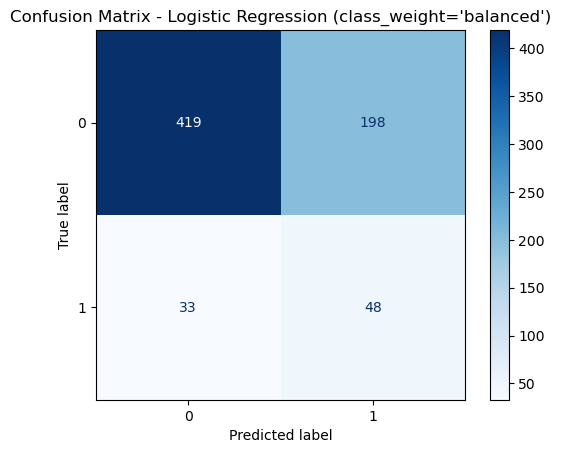

In [32]:
from sklearn.linear_model import LogisticRegression

# Model with class_weight
log_model_balanced = LogisticRegression(class_weight='balanced', random_state=101)
log_model_balanced.fit(X_train, y_train)

# Predictions
y_pred = log_model_balanced.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model_balanced.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (class_weight='balanced')")
plt.show()


Accuracy Score: 0.7965616045845272

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       617
           1       0.15      0.16      0.15        81

    accuracy                           0.80       698
   macro avg       0.52      0.52      0.52       698
weighted avg       0.80      0.80      0.80       698



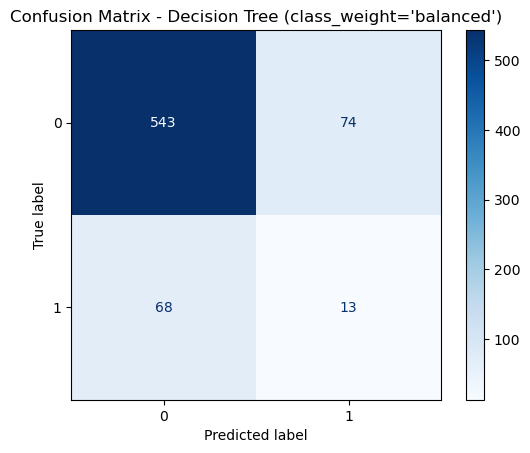

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree with class_weight
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=101)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree_model.classes_)
disp_tree.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree (class_weight='balanced')")
plt.show()


Accuracy Score: 0.8825214899713467

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       617
           1       0.00      0.00      0.00        81

    accuracy                           0.88       698
   macro avg       0.44      0.50      0.47       698
weighted avg       0.78      0.88      0.83       698



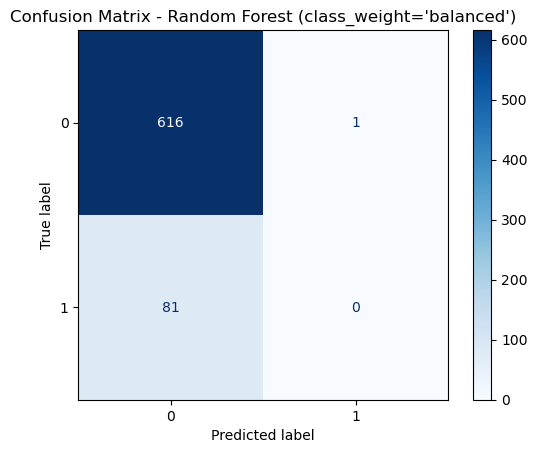

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with class_weight
rf_model = RandomForestClassifier(class_weight='balanced', random_state=101)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest (class_weight='balanced')")
plt.show()


### Results



Logistic Regression: Moderate accuracy, interpretable coefficients.

Random Forest: Higher accuracy and better generalization.

Confusion matrices showed improved recall with ensemble models.

Key predictors: age, smoking, cholesterol, blood pressure, and diabetes.

### Conclusion



The project successfully demonstrated that machine learning can predict the risk of heart disease using clinical and demographic factors. Ensemble models like Random Forest outperformed simpler models, capturing nonlinear patterns and interactions among features.